FetalAl: Using Machine Learning to predict and monitor
Fetal Health


In [32]:
import numpy as np
import pandas as pd
#pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=27330c1df92e2c35bad117f82262c03f1ddd4df99f562c5aeb835ecb2fafbb45
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
  

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import kNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import Linearsvc, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings .filterwarnings(action='ignore')


ImportError: ignored

In [4]:
data =pd.read_csv("/content/fetal_health.csv")

In [30]:
pf = ProfileReport(data, title="Profiling Report")
pf

NameError: ignored

In [ ]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.shape

(2126, 22)

In [ ]:
data.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [ ]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
data = data.drop_duplicates()
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
#first of all Let us evaluate the target and find out if our data
data['fetal_health'].value_counts()


1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

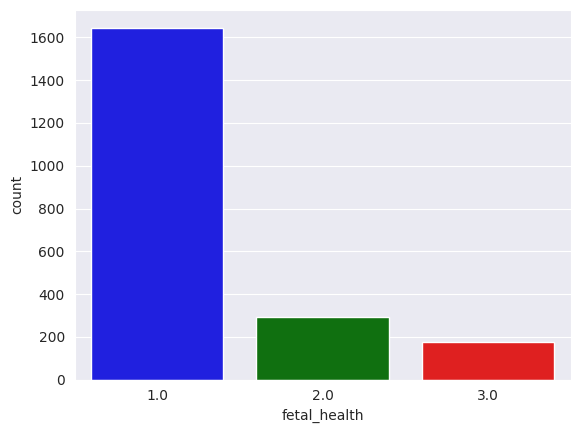

In [11]:
custom_palette = ['blue', 'green', 'red',]
sns.countplot(data=data, x="fetal_health",palette=custom_palette)


In [ ]:
#Milestone 3: Exploratory Data Analysis

#Activity 1: Descriptive statistical analysis


In [12]:
data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

**Visual** **Analysis**

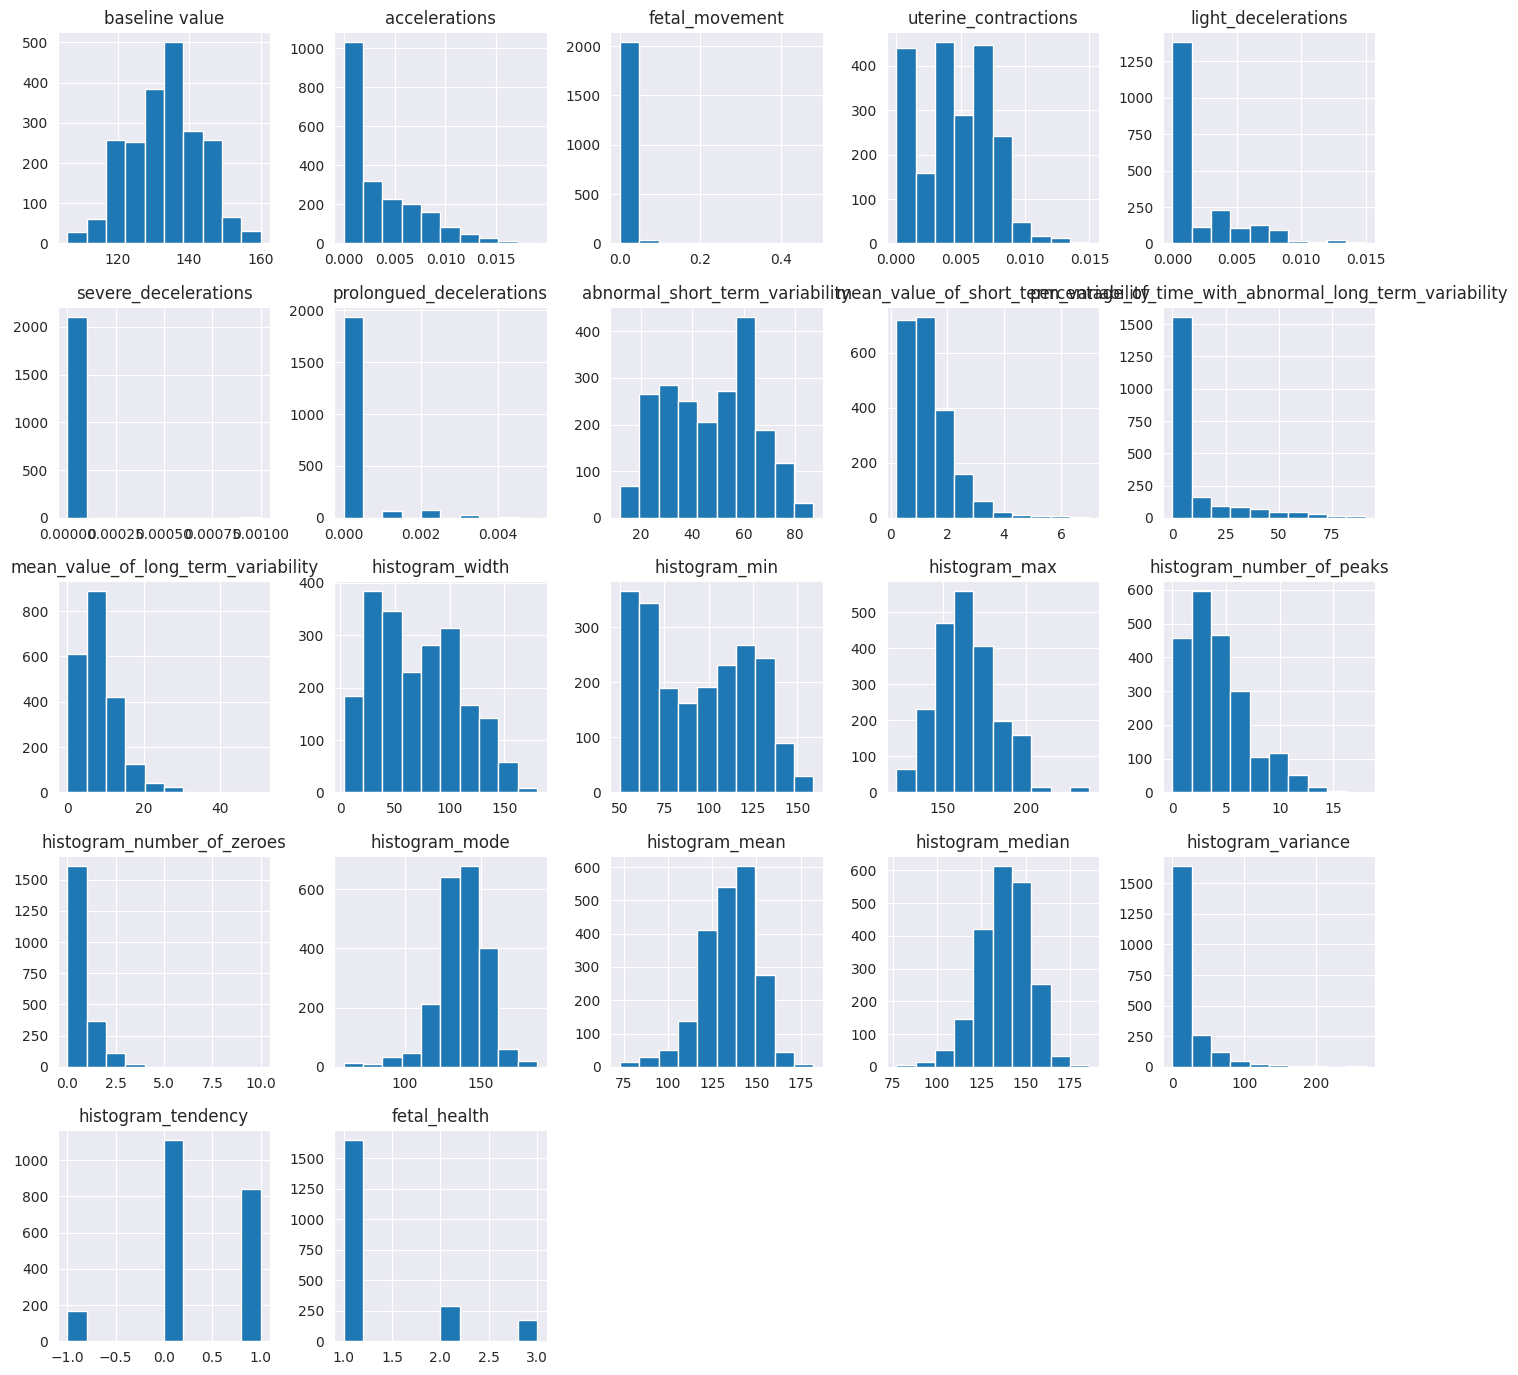

In [13]:
data.hist(figsize=(17,17),layout=(5,5),sharex=False);

baseline value                                               Axes(0.125,0.747241;0.133621x0.132759)
accelerations                                             Axes(0.285345,0.747241;0.133621x0.132759)
fetal_movement                                             Axes(0.44569,0.747241;0.133621x0.132759)
uterine_contractions                                      Axes(0.606034,0.747241;0.133621x0.132759)
light_decelerations                                       Axes(0.766379,0.747241;0.133621x0.132759)
severe_decelerations                                         Axes(0.125,0.587931;0.133621x0.132759)
prolongued_decelerations                                  Axes(0.285345,0.587931;0.133621x0.132759)
abnormal_short_term_variability                            Axes(0.44569,0.587931;0.133621x0.132759)
mean_value_of_short_term_variability                      Axes(0.606034,0.587931;0.133621x0.132759)
percentage_of_time_with_abnormal_long_term_variability    Axes(0.766379,0.587931;0.133621x0.132759)


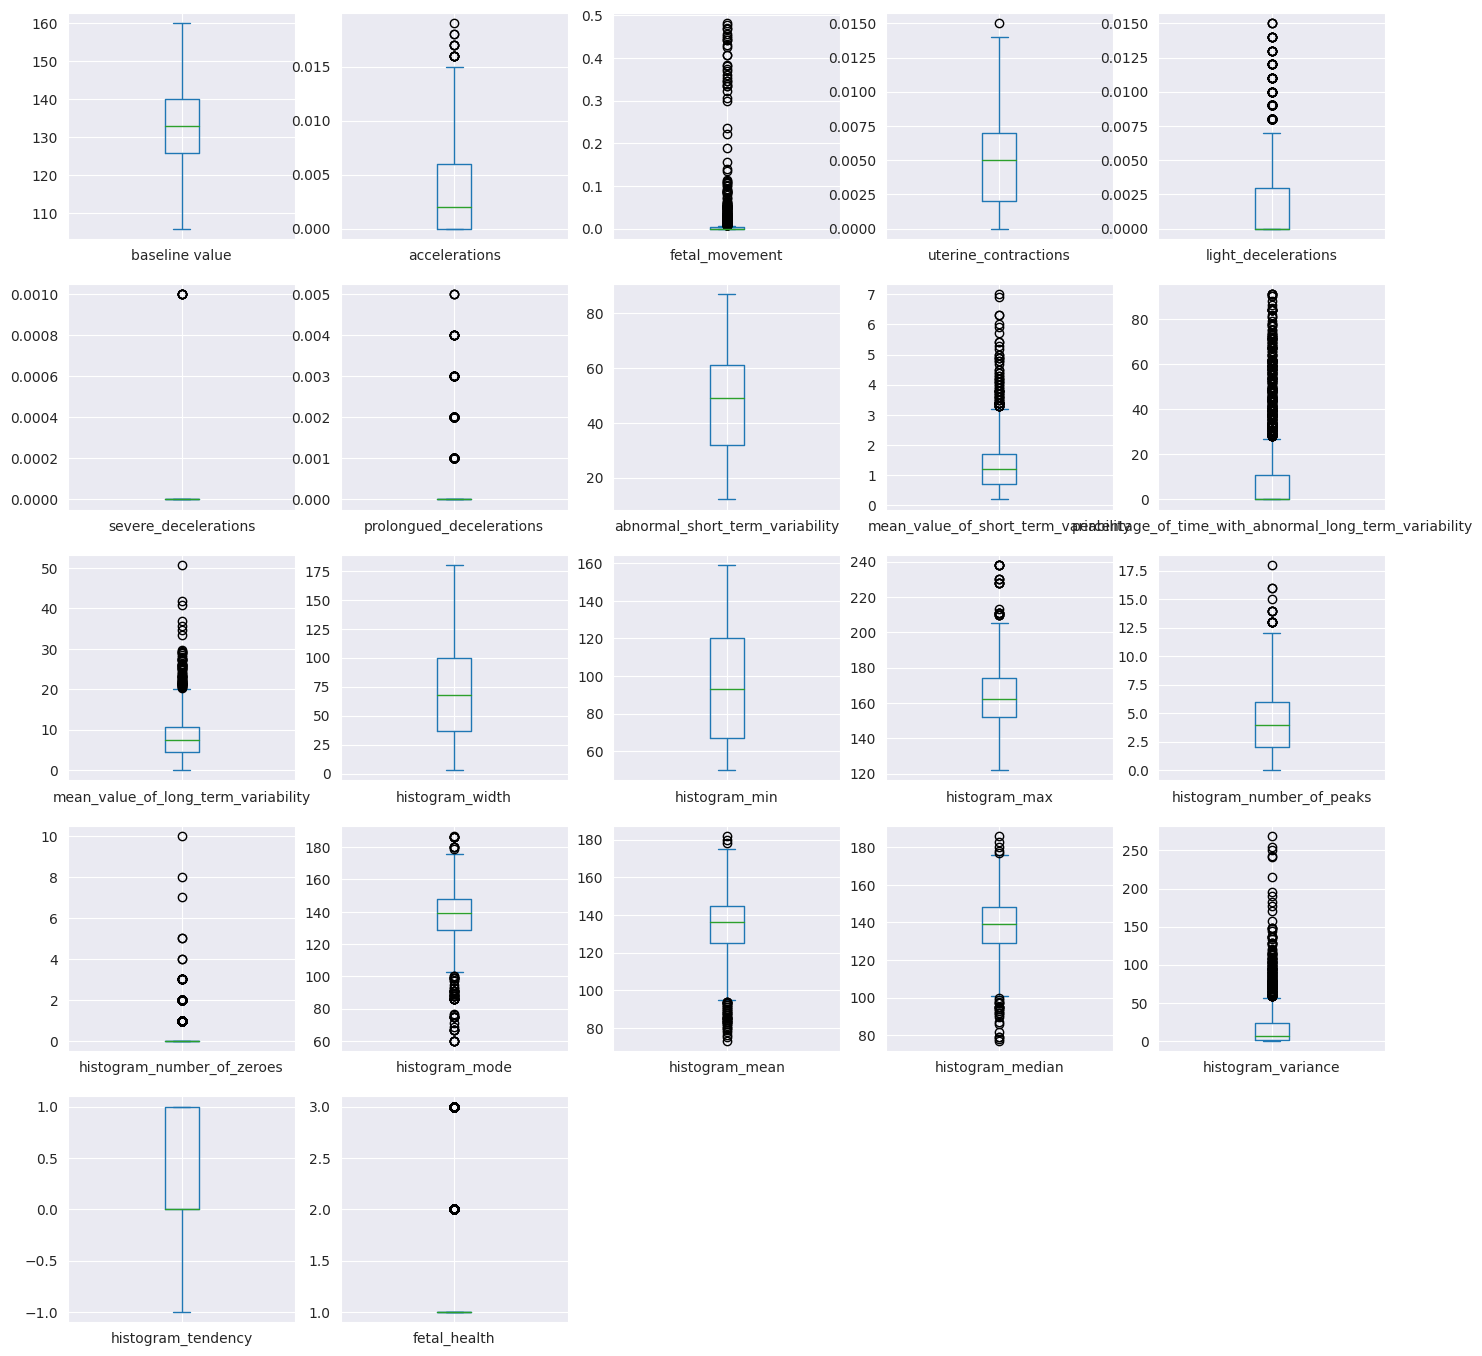

In [14]:
data.plot(kind='box', figsize=(17, 17), layout=(5, 5), sharex=False, subplots=True)


<Axes: xlabel='fetal_movement', ylabel='fetal_health'>

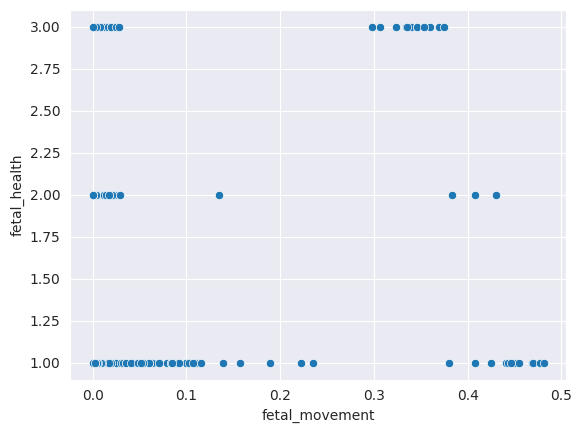

In [15]:
#bivariate Analysis
import seaborn as sns

# Assuming 'data' is your DataFrame
sns.scatterplot(x=data['fetal_movement'], y=data['fetal_health'])


<Axes: >

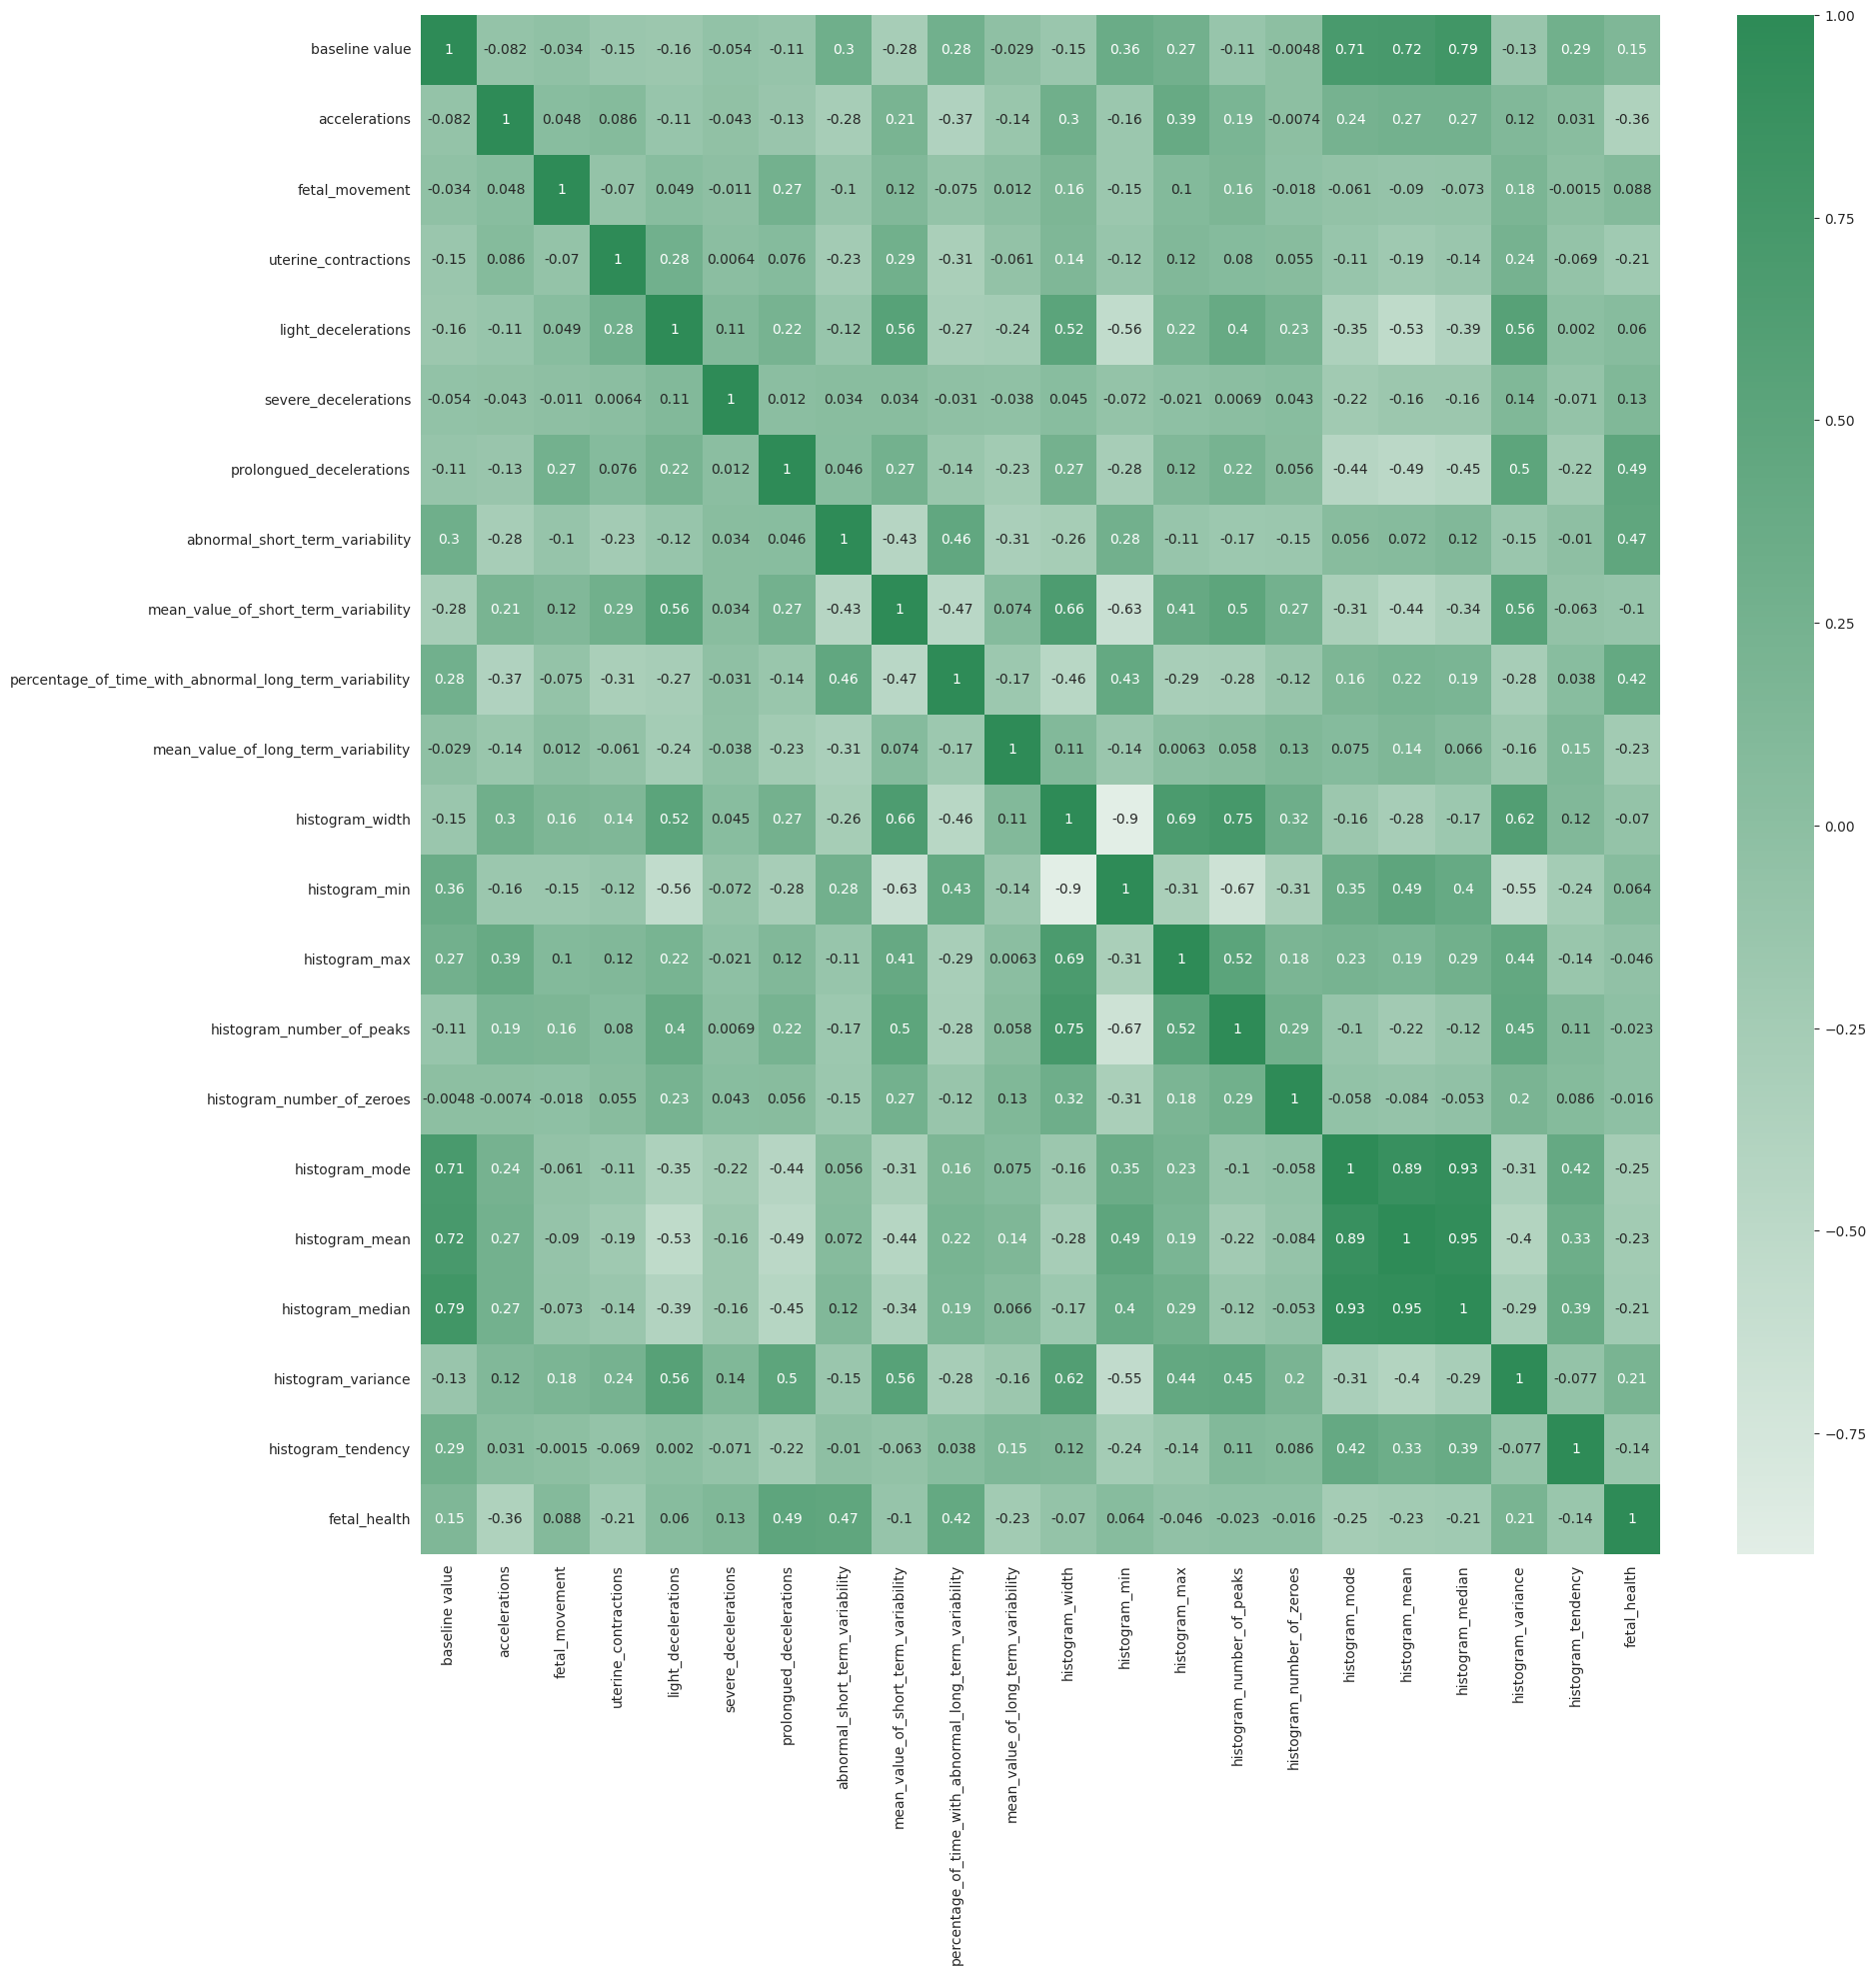

In [16]:
#multivariate analaysis
#correlation matrix
corrmat= data.corr()
plt. figure(figsize=(20,20))
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)




In [ ]:
#feature selection

In [17]:
data.drop(columns=["histogram_mean"], axis=1, inplace=True)
data.corr()["fetal_health"].sort_values(ascending=False)


fetal_health                                              1.000000
prolongued_decelerations                                  0.486752
abnormal_short_term_variability                           0.469671
percentage_of_time_with_abnormal_long_term_variability    0.421634
histogram_variance                                        0.208171
baseline value                                            0.146077
severe_decelerations                                      0.132408
fetal_movement                                            0.088057
histogram_min                                             0.063529
light_decelerations                                       0.059651
histogram_number_of_zeroes                               -0.016376
histogram_number_of_peaks                                -0.022856
histogram_max                                            -0.046480
histogram_width                                          -0.069529
mean_value_of_short_term_variability                     -0.10

In [18]:
columns_to_select = [
    "prolongued_decelerations", "abnormal_short_term_variability",
    "percentage_of_time_with_abnormal_long_term_variability",
    "histogram_variance", "baseline value", "severe_decelerations",
    "fetal_movement", "histogram_min", "light_decelerations",
    "histogram_number_of_zeroes", "histogram_number_of_peaks",
    "histogram_max", "histogram_width", "mean_value_of_short_term_variability",
    "histogram_tendency", "uterine_contractions", "histogram_median",
    "mean_value_of_long_term_variability", "histogram_mode", "accelerations"
]
new_data = data.loc[:, columns_to_select]

In [19]:
new_data.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,baseline value,severe_decelerations,fetal_movement,histogram_min,light_decelerations,histogram_number_of_zeroes,histogram_number_of_peaks,histogram_max,histogram_width,mean_value_of_short_term_variability,histogram_tendency,uterine_contractions,histogram_median,mean_value_of_long_term_variability,histogram_mode,accelerations
0,0.0,73.0,43.0,73.0,120.0,0.0,0.0,62.0,0.000,0.0,2.0,126.0,64.0,0.5,1.0,0.000,121.0,2.4,120.0,0.000
1,0.0,17.0,0.0,12.0,132.0,0.0,0.0,68.0,0.003,1.0,6.0,198.0,130.0,2.1,0.0,0.006,140.0,10.4,141.0,0.006
2,0.0,16.0,0.0,13.0,133.0,0.0,0.0,68.0,0.003,1.0,5.0,198.0,130.0,2.1,0.0,0.008,138.0,13.4,141.0,0.003
3,0.0,16.0,0.0,13.0,134.0,0.0,0.0,53.0,0.003,0.0,11.0,170.0,117.0,2.4,1.0,0.008,137.0,23.0,137.0,0.003
4,0.0,16.0,0.0,11.0,132.0,0.0,0.0,53.0,0.000,0.0,9.0,170.0,117.0,2.4,1.0,0.008,138.0,19.9,137.0,0.007


**Scalling the Data**

In [43]:
from sklearn.preprocessing import MinMaxScaler
#X = new_data.drop(columns=['fetal_health'])
X=data[['fetal_health','baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','histogram_width']]
y = data["fetal_health"]
# Instantiating MinMaxScaler
scale = MinMaxScaler()
# Scaling the features in X
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X_scaled.head()


,fetal_health,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,histogram_width
0,0.5,0.259259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.344633
1,0.0,0.481481,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.717514
2,0.0,0.500000,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.717514
3,0.0,0.518519,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.644068
4,0.0,0.481481,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.644068


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined (features and target variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape)  # Corrected variable names for y_test and X_test


(1479, 10) (634, 10)


**Applying SMOTE for balancing the data**

In [45]:
!pip install imblearn

In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))







Before SMOTE: Counter({1.0: 1152, 2.0: 206, 3.0: 121})
After SMOTE: Counter({1.0: 1152, 2.0: 1152, 3.0: 1152})


**Model Building**

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Assuming X_train_smote, y_train_smote, and x_test are defined and ready to use

# Create an instance of RandomForestClassifier
RF_model = RandomForestClassifier()

# Fit the model using the training data after SMOTE
RF_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predictions = RF_model.predict(X_test)

# Evaluate the accuracy
RF_accuracy=accuracy_score(y_test, predictions)
print("Accuracy:", accuracy_score(y_test, predictions))

# Create a confusion matrix
pd.crosstab(y_test, predictions)


Accuracy: 1.0


col_0,1.0,2.0,3.0
fetal_health,,,
1.0,494,0,0
2.0,0,86,0
3.0,0,0,54


For the amount of training data is: 3456
Accuracy of RandomForestClassifier: 1.0


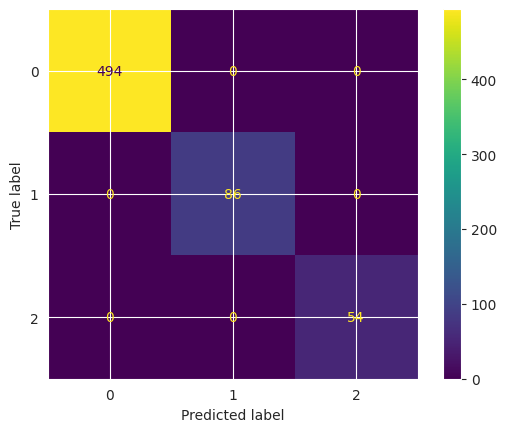

In [48]:


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
size = len(X_train_smote)
print("For the amount of training data is:", size)  # Assuming 'size' is defined earlier

print("Accuracy of RandomForestClassifier:", RF_model.score(X_test, y_test))
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()


**Decision Tree**

In [53]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_smote, y_train_smote)
predictions = DT_model.predict(X_test)
DT_accuracy=accuracy_score(y_test,predictions)
print(accuracy_score(y_test,predictions))


1.0


In [52]:

size = len(X_train_smote)
print("For the amount of training data is:", size)  # Assuming 'size' is defined earlier

print("Accuracy of  DecisionTreeClassifier:", DT_model.score(X_test, y_test))
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()

For the amount of training data is: 3456


ValueError: ignored

**Logistic Regression**

In [54]:
LR_model = LogisticRegression()
LR_model.fit(X_train_smote, y_train_smote)
predictions = LR_model.predict(X_test)
LR_accuracy=accuracy_score(y_test,predictions)
print(accuracy_score(y_test,predictions))


1.0


For the amounts of training data is:  3456
Accuracy of LogisticRegression: 1.0


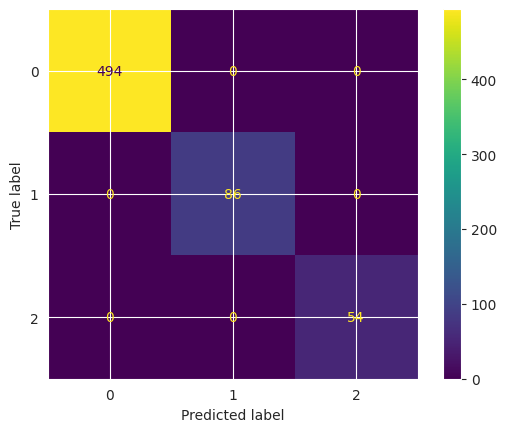

In [55]:
print("For the amounts of training data is: ",size)

print("Accuracy of LogisticRegression:",LR_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()


In [56]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_smote, y_train_smote, and X_test are defined and ready to use

# Create an instance of KNeighborsClassifier with 5 neighbors
KNN_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model using the training data after SMOTE
KNN_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predictions = KNN_model.predict(X_test)

# Calculate and print the accuracy
KN_accuracy=accuracy_score(y_test, predictions)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.8107255520504731


For the amounts of training data is:  3456
Accuracy of KNeighborsClassifier:  0.8107255520504731


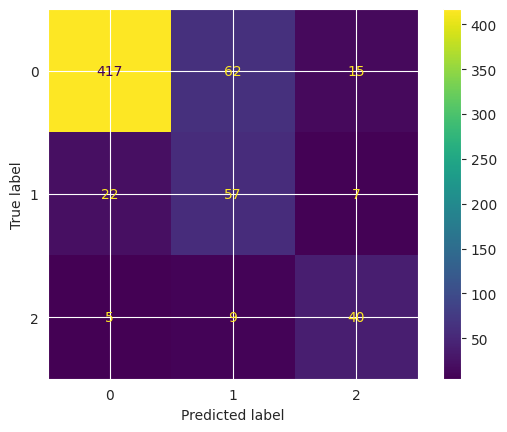

In [57]:
print("For the amounts of training data is: ",size)

print("Accuracy of KNeighborsClassifier: ",KNN_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()


In [58]:
#performance Testing
names = ['RandomForestClassifier', 'KNeighborsClassifier',"LogisticRegression","DecisionTreeClassifier",]
scores = [RF_accuracy, KN_accuracy,LR_accuracy,DT_accuracy]

# Create a DataFrame to display names and scores
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df



,name,score
0,RandomForestClassifier,1.000000
1,KNeighborsClassifier,0.810726
2,LogisticRegression,1.000000
3,DecisionTreeClassifier,1.000000


In [59]:
CM=sns.light_palette("red",as_cmap=True)
C=df.style.background_gradient(cmap=CM)

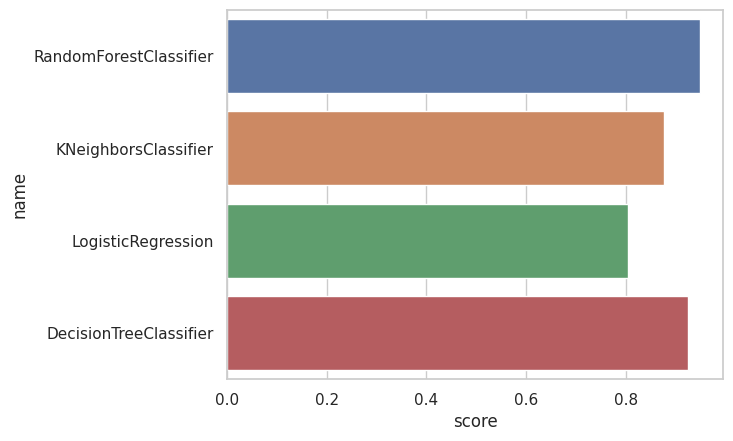

In [121]:
sns.set(style="whitegrid")
ax=sns.barplot(y="name", x="score", data=df)


In [60]:
# saving the model

import pickle
pickle.dump(RF_model,open('fetal_health1.pk1l','wb'))